# Практическое занятие №1 (Анализ сложности алгоритмов)

## Часть 1. Цель задания – научиться на основе экспериментальных данных определять вычислительную сложность алгоритма.


### Бинарный поиск

---


In [66]:
from random import randint
import time
import matplotlib.pyplot as plt

**Алгоритм бинарного поиска**

1. Заданный массив сортируем по возрастанию
2. Находим средний элемент в массиве. Для этого первый и последний индексы связываются с переменными, а индекс среднего элемента вычисляется.
3. Значение среднего элемента сравнивается с нужным значением. Если значение среднего элемента оказывается равным нужному, поиск завершается.
4. Иначе, в зависимости от того, нужное значение больше или меньше значения среднего элемента, дальнейший поиск будет происходить только в левой или только в правой половинах массива.
Для этого одна из границ исследуемой последовательности сдвигается.
5. Если нужное значение больше значения среднего элемента, то нижняя граница сдвигается за средний элемент на один элемент справа. Если нужное значение меньше значения среднего элемента, то верхняя граница сдвигается на элемент перед средним.
Снова находится средний элемент теперь уже в выбранной половине. Описанный выше алгоритм повторяется для данного среза, и так до тех пор, пока элемент не будет найден нужный элемент

Функция для бинарного поиска

In [68]:
def binary_search_realization(mas, value):
    mas.sort()
    #индексы первого и последнего элементов
    left = 0
    right = len(mas) - 1

    while left <= right:
        average = (left + right) // 2
        if value == mas[average]:
            return average
        elif value > mas[average]:
            left = average + 1
        else:
            right = average - 1
    return -1


Функция для нахождения времени работы алгоритма бинарного поиска

In [69]:
def execution_time(n):
    start_time = time.time() #начинаем считать время работы

    #создание массива
    mas = []
    for i in range(n):
        mas.append(randint(1, 50))

    result = binary_search_realization(mas, value)

    end_time = time.time() #заканчиваем считать время работы
    execution_time = end_time - start_time
    return execution_time*1000

Рисуем график

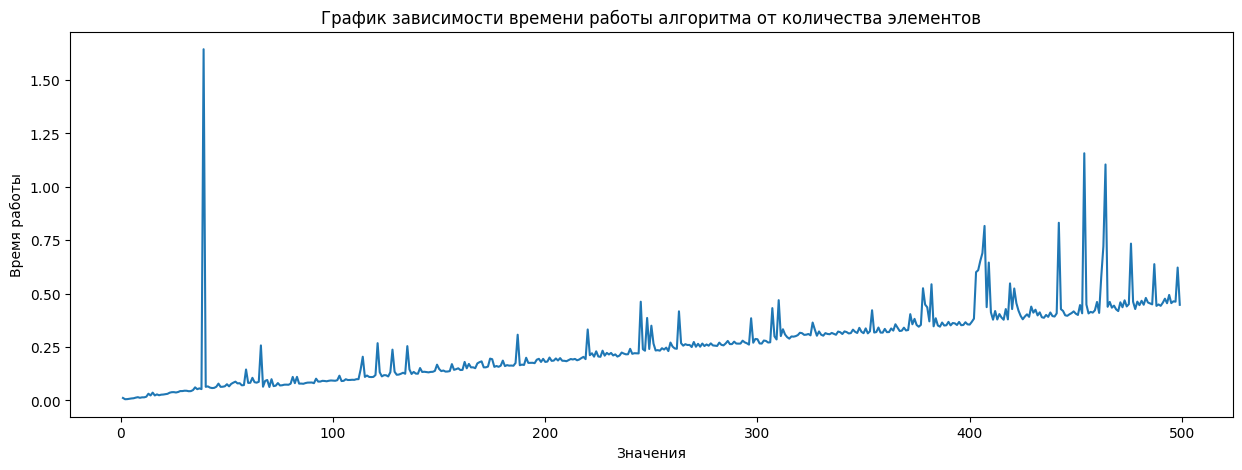

In [87]:
N = [i for i in range(1, 500)]
value = randint(1, 100)
working_time = [execution_time(n) for n in N]

plt.figure(figsize=(15, 5))
plt.plot(N, working_time)
plt.xlabel('Значения')
plt.ylabel('Время работы')
plt.title('График зависимости времени работы алгоритма от количества элементов')
plt.show()

Гипотеза: Сложность алгоритма бинарного поиска - логарифмическая О(log(n))

Проверка гипотезы

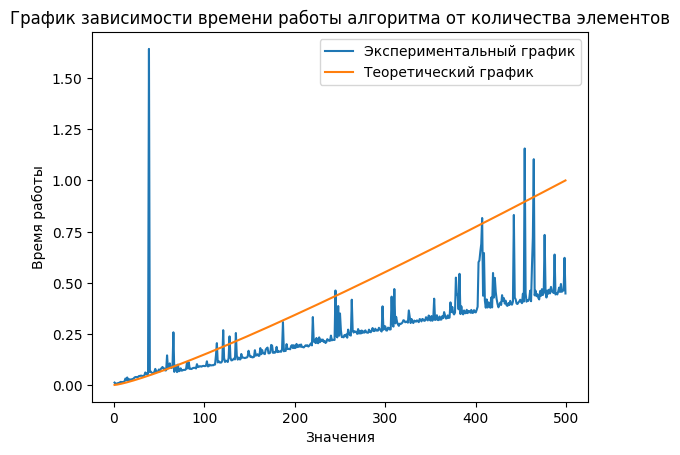

In [88]:
import numpy as np
O_N_log_N = N * np.log(N)
# Нормируем значения функции в диапазон от 0 до 1
O_N_log_N_normalized = O_N_log_N / O_N_log_N.max()

plt.plot(N, working_time, label='Экспериментальный график')
plt.plot(N, O_N_log_N_normalized, label='Теоретический график')
plt.xlabel('Значения')
plt.ylabel('Время работы')
plt.legend()
plt.title('График зависимости времени работы алгоритма от количества элементов')
plt.show()

### Алгоритм Дейкстры

---


**Алгоритм Дейкстры** — это метод нахождения кратчайших путей от одной вершины графа ко всем остальным.

Каждой вершине из множества вершин V сопоставим метку — минимальное известное расстояние от этой вершины до стартовой вершины a.
Алгоритм работает пошагово — на каждом шаге он «посещает» одну вершину и пытается уменьшать метки.
Работа алгоритма завершается, когда все вершины посещены.

Инициализация.
Метка самой вершины a полагается равной 0, метки остальных вершин — бесконечности.
Это отражает то, что расстояния от a до других вершин пока неизвестны.
Все вершины графа помечаются как непосещённые.

Шаг алгоритма.
Если все вершины посещены, алгоритм завершается.
В противном случае, из ещё не посещённых вершин выбирается вершина u, имеющая минимальную метку.

Мы рассматриваем все возможные маршруты, в которых u является предпоследним пунктом. Вершины, в которые ведут рёбра из u, назовём соседями этой вершины. Для каждого соседа вершины u, кроме отмеченных как посещённые, рассмотрим новую длину пути, равную сумме значений текущей метки u и длины ребра, соединяющего u с этим соседом.

Если полученное значение длины меньше значения метки соседа, заменим значение метки полученным значением длины. Рассмотрев всех соседей, пометим вершину u как посещённую и повторим шаг алгоритма.

Мы взяли готовую реализацию алгоритма Дейкстры с использованием библиотеки heapq. Функция, генерирующая полносвязный граф на заданном числе вершин, и функция, считающая время выполнения функции, были написаны самостоятельно.

In [ ]:
#импорты

import heapq
from random import randint
import time
import matplotlib.pyplot as plt

In [ ]:
#функции


def count_time(func):
    #считает время выполнения заданной функции

    def wrapper(*args, **kwargs):
        time_start = time.perf_counter()
        res = func(*args, **kwargs)
        return time.perf_counter() - time_start

    return wrapper


def gen_graph(vert_amnt):
    #генерирует полносвязный граф на заданном числе вершин
    if vert_amnt < 3: vert_amnt = 3

    graph = dict()

    for vert in range(vert_amnt):
        ways = dict()

        for neib in range(vert_amnt):
            if neib == vert: continue
            else:
                if neib in graph:
                    ways[neib] = graph[neib][vert]
                else:
                    ways[neib] = randint(1, 15)
        graph[vert] = ways

    return graph


@count_time
def dejkstra(graph, start=0):
    # Инициализация словаря для хранения расстояний
    # до каждой вершины. Сначала все расстояния бесконечны.
    distances = {vertex: float('infinity') for vertex in graph}

    # Расстояние до начальной вершины равно 0.
    distances[start] = 0

    # Создаём приоритетную очередь для хранения вершин и их расстояний.
    priority_queue = [(0, start)]

    while priority_queue:
        # Извлекаем вершину с наименьшим расстоянием из очереди.
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Если текущее расстояние до вершины уже больше, чем сохранённое расстояние, игнорируем её.
        if current_distance > distances[current_vertex]:
            continue

        # Рассмотрим все соседние вершины текущей вершины.
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Если найден более короткий путь до соседа, обновим расстояние.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances


In [ ]:
#запуск алгоритма при различном количестве вершин

results = dict()

for vert_amnt in range(3, 200):
    results[vert_amnt] = dejkstra(gen_graph(vert_amnt))

Text(0, 0.5, 'Затраченное время, сек')

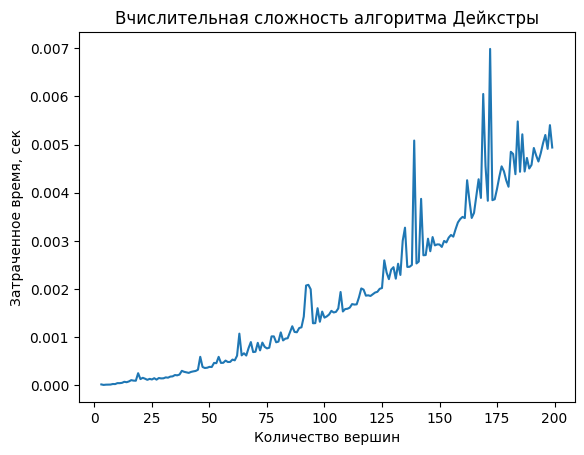

In [ ]:
#построение графика по полученным результатам

plt.plot(list(results.keys()), list(results.values()))
plt.title("Вчислительная сложность алгоритма Дейкстры")
plt.xlabel('Количество вершин')
plt.ylabel('Затраченное время, сек')

**Выдвижение гипотезы**

Исходя из получившегося графика можно сделать вывод, что алгоритм Дейкстры, применяемый к полносвязным графам
на N вершинах относится к экспоненциальному классу сложности и, следовательно, его верхняя оценка сложности -
это график показательной функции с основанием 2.

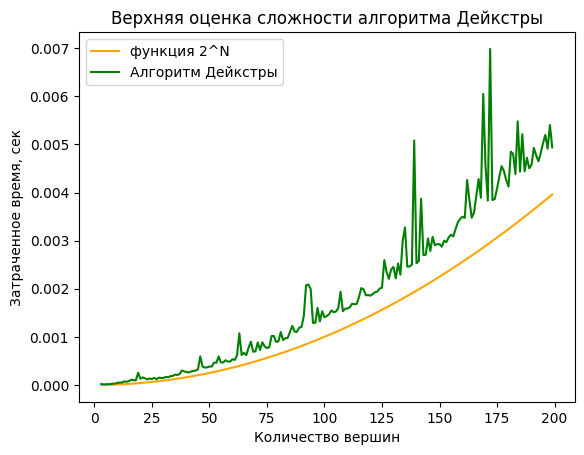

In [ ]:
#генерация массива для построения графика, подтверждающего гипотезу
coords = []

for N in range(3, 200):
    coords.append(10**(-7)*N**2)


#проверка гипотезы

plt.plot(list(results.keys()), coords, label='функция 2^N', color='orange')
plt.plot(list(results.keys()), list(results.values()), label='Алгоритм Дейкстры', color='green')
plt.title("Верхняя оценка сложности алгоритма Дейкстры")
plt.xlabel('Количество вершин')
plt.ylabel('Затраченное время, сек')
plt.legend()

### Алгоритм кодирования Хаффмана (Huffman Algorithm), LZW

---




Алгоритм Хаффмана — это метод сжатия данных без потерь, который используется для уменьшения объема данных. Основан на характере частоты появления символов в входных данных, и он особенно эффективен, когда одни символы встречаются чаще других.


Принципы работы

1. Подсчет частот: Для каждого символа в исходных данных подсчитывается частота появления.

2. Построение приоритетной очереди: Создается приоритетная очередь, где каждый узел — это символ и его частота. Менее частые символы имеют меньший приоритет.

3. Построение дерева Хаффмана:
   \- Извлекаются два узла с наименьшим приоритетом (самой низкой частотой) из очереди.
   \- Создается новый объединенный узел с суммой частот этих двух узлов.
   \- Новый узел добавляется обратно в очередь.
   \- Процесс повторяется до тех пор, пока все узлы не будут объединены в одно дерево.

4. Кодирование символов: Каждому символу присваивается уникальный префиксный код по пути от корня до листа дерева. Левый ход в дереве обычно обозначается битом '0', а правый — '1'.

5. Сжатие данных: Исходные данные преобразуются в поток битов на основе кодов символов.

#####**Готовая реализация алгоритма:**

Для проведения тестов мы взяли библиотеку huffman (https://pypi.org/project/huffman/), которая позволяет найти оптимальный способ сжатия отдельных символов в двоичную последовательность, которая может быть однозначно декодирована без разделителей между символами.

На вход алгоитму передается структура в формате списка кортежей в формате (символ, вес). На выходе мы получаем словарь, где каждое значение будет иметь свою кодировку.



**Пример работы:**

In [ ]:
!pip install huffman

  Using cached huffman-0.1.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached huffman-0.1.2-py2.py3-none-any.whl (4.6 kB)


In [ ]:
import huffman
from collections import Counter

huffman.codebook(Counter('Сегодня мы оцениваем Алгоритм Хаффмана').items())

{'С': '00010',
 'е': '1101',
 'г': '10111',
 'о': '1110',
 'д': '01111',
 'н': '1100',
 'я': '01101',
 ' ': '001',
 'м': '100',
 'ы': '10100',
 'ц': '01110',
 'и': '0000',
 'в': '00011',
 'а': '1111',
 'А': '01100',
 'л': '10110',
 'р': '01011',
 'т': '01010',
 'Х': '10101',
 'ф': '0100'}

#####**Замеры времен работы алгоритма:**

Сначала напишем функцию, которая на вход получает длину массива, а на выход время его действия.

In [ ]:
import huffman
from collections import Counter
import datetime
import random
import string


def working_time(n: int):
  """
  :param n: Количество символов в передаваемой строке
  :return: Время работы команды в микросекундах
  """
  start = datetime.datetime.now()

  # создаем тестовю строку из n элементов
  letters = string.ascii_lowercase + ' '
  test_str = ''.join(random.choice(letters) for i in range(n))

  # Запускаем алгоритм с произвольной строкой
  huffman.codebook(Counter(test_str).items())

  finish = datetime.datetime.now()
  return (finish - start).microseconds


Теперь проводим замеры:

In [ ]:
N = [i for i in range(1, 1000)]  # длины массива
t_N = [working_time(n) for n in N]  # время для каждого N в милисекундах

Строим график для полуяенных данных:

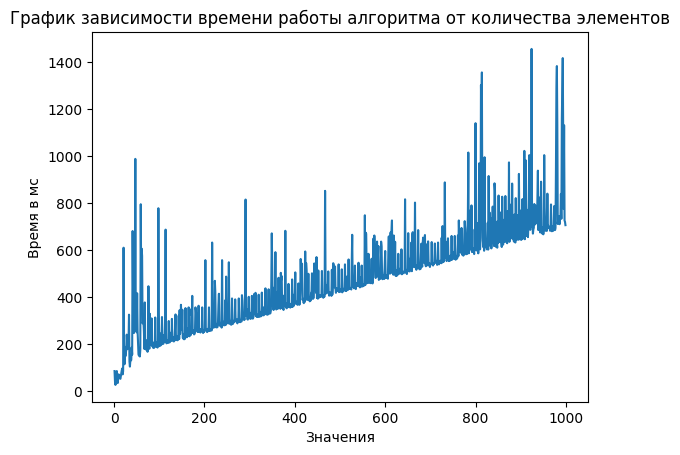

In [ ]:
import matplotlib.pyplot as plt

plt.plot(N, t_N)
plt.xlabel('Значения')
plt.ylabel('Время в мс')
plt.title('График зависимости времени работы алгоритма от количества элементов')
plt.show()

**Гипотеза:**

На основе получившегося графика можно предположить, что сложность кодирования Хоффмана - линейная сложность O(N), где n — длина входного сообщения.

**Проверка гипотезы:**

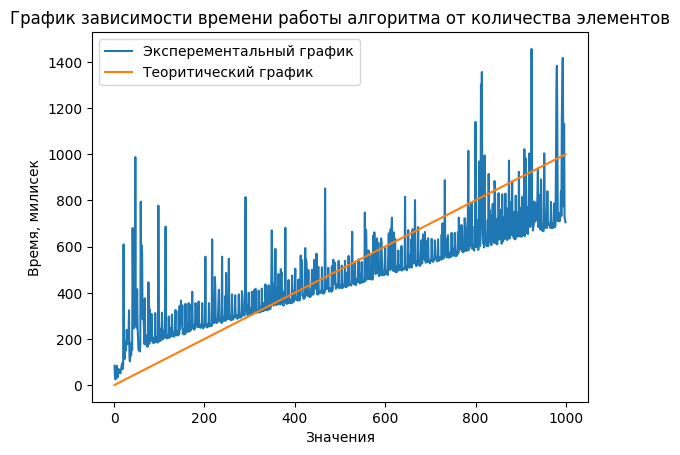

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(N, t_N, label="Эксперементальный график")
plt.plot(N, N, label="Теоритический график")
plt.xlabel('Значения')
plt.ylabel('Время, милисек')
plt.legend()
plt.title('График зависимости времени работы алгоритма от количества элементов')
plt.show()

## 2 часть. Цель задания – сравнить время работы алгоритма в различных случаях.

Алгоритмы, взятые для этой части задания:


1.   Бинарный поиск

  * Готовая реализация:

      В качестве готового алгоритма мы взяли библотеку search-binary, которая на вход принимает список из целых чисел и число, которое мы ищем. На выход алгоритм выдает индекс искомого числа.
  * Собсвенная реализация


2.   Быстрая сортировка
  * Готовая реализация:

       В качестве готового алгоритма мы взяли библотеку pysort, в которой представлены реализации различных алгоритмов сортировок, в том числе и нужная нам. На вход алгоритм принимает список из целых чисел, а на выходе мы получаем его же, но уже отсортированного.
  *  Собсвенная реализация





#####**Готовые алгоритмы:**

In [38]:
# Бинарный поиск
!pip install search-binary

In [39]:
from search_binary import binary_search

arr = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 5
result = binary_search(arr, target)
result

4

In [40]:
# быстрая сортировка
!pip install pysort

In [41]:
from sorting_techniques import pysort
sortObj = pysort.Sorting()

myList = [1,3,2,7,4,89,56,99,111,23,6445,566]

sortResult = sortObj.heapSort(myList)
sortResult

[1, 2, 3, 4, 7, 23, 56, 89, 99, 111, 566, 6445]

#####**Собственная реализация:**

In [42]:
# Бинарный поиск


def binary_search_our(mas, value):
    mas.sort()
    #индексы первого и последнего элементов
    left = 0
    right = len(mas) - 1

    while left <= right:
        average = (left + right) // 2
        if value == mas[average]:
            return average
        elif value > mas[average]:
            left = average + 1
        else:
            right = average - 1
    return -1


In [43]:
# Быстрая сортировкка
import sys
sys.setrecursionlimit(10000)


def quick_sort(lst):
    if len(lst) == 1: return lst

    pivot = lst[0]
    rlst = []
    llst = []

    for el in lst[1:]:
        if el < pivot: llst.append(el)
        else: rlst.append(el)

    if llst == []: llst.append(pivot)
    else: rlst = [pivot] + rlst

    return quick_sort(llst)+quick_sort(rlst)


####**Замеры времени работы в различных случаях**

#####**Замеры для маленького N (равного 5)**

Бинарная сортировка. Готовая реализация

In [61]:
from search_binary import binary_search
import time
import random

def analyze_binary_search(arr):

    start_time = time.perf_counter()
    target_the_best = 3
    binary_search(arr, target_the_best)
    end_time = time.perf_counter()
    bin_lib_execution_time_the_best = end_time - start_time
    print('Время работы алгоритма в лучшем случае:', bin_lib_execution_time_the_best*1000000)

    for _ in range(5):
        total_time = 0
        target_middle = random.choice(arr)  # выбираем случайный элемент для поиска
        start_time = time.perf_counter()
        binary_search(arr, target_middle)
        total_time += time.perf_counter() - start_time

    bin_lib_average_time = total_time/5
    print('Время работы алгоритма в среднем случае:', bin_lib_average_time*1000000)

    start_time = time.perf_counter()
    target_the_worst = 6
    binary_search(arr, target_the_worst)
    end_time = time.perf_counter()
    bin_lib_execution_time_the_worst = end_time - start_time
    print('Время работы алгоритма в худшем случае:', bin_lib_execution_time_the_worst*1000000)

arr = [1, 2, 3, 4, 5]
analyze_binary_search(arr)

Время работы алгоритма в лучшем случае: 8.283999704872258
Время работы алгоритма в среднем случае: 0.40739996620686725
Время работы алгоритма в худшем случае: 2.6349998734076507


Бинарная сортировка. Собственная реализация

In [62]:
arr = [1, 2, 3, 4, 5]
analyze_binary_search(arr)

Время работы алгоритма в лучшем случае: 6.229999598872382
Время работы алгоритма в среднем случае: 0.197000008483883
Время работы алгоритма в худшем случае: 6.568000571860466


Быстрая сортировка. Готовая реализация

In [63]:
from sorting_techniques import pysort
import random
sortObj = pysort.Sorting()

best_lst = [i for i in range(0, 5)]
midl_lst = [random.randint(-100, 100) for i in range(5)]
hard_lst = [i for i in range(5, 0, -1)]

#лучшее время
start_time = time.perf_counter()
sortResult = sortObj.heapSort(best_lst)
end_time = time.perf_counter()
execution_time_the_best = end_time - start_time
print('Время работы алгоритма в лучшем случае:', execution_time_the_best*1000000)

#среднее время
start_time = time.perf_counter()
sortResult = sortObj.heapSort(midl_lst)
end_time = time.perf_counter()
execution_time_middle = end_time - start_time
print('Время работы алгоритма в среднем случае:', execution_time_middle*1000000)

#худшее время
start_time = time.perf_counter()
sortResult = sortObj.heapSort(hard_lst)
end_time = time.perf_counter()
execution_time_middle = end_time - start_time
print('Время работы алгоритма в худшем случае:', execution_time_middle*1000000)

Время работы алгоритма в лучшем случае: 116.67899980238872
Время работы алгоритма в среднем случае: 162.26200023083948
Время работы алгоритма в худшем случае: 130.91999971948098


Быстрая сортировка. Собственная реализация

In [65]:
best_lst = [i for i in range(0, 5)]
midl_lst = [random.randint(-100, 100) for i in range(5)]
hard_lst = [i for i in range(5, 0, -1)]

#лучшее время
start_time = time.perf_counter()
quick_sort(best_lst)
end_time = time.perf_counter()
execution_time_the_best = end_time - start_time
print('Время работы алгоритма в лучшем случае:', execution_time_the_best*1000000)

#среднее время
start_time = time.perf_counter()
quick_sort(midl_lst)
end_time = time.perf_counter()
execution_time_middle = end_time - start_time
print('Время работы алгоритма в среднем случае:', execution_time_middle*1000000)

#худшее время
start_time = time.perf_counter()
quick_sort(hard_lst)
end_time = time.perf_counter()
execution_time_middle = end_time - start_time
print('Время работы алгоритма в худшем случае:', execution_time_middle*1000000)

Время работы алгоритма в лучшем случае: 103.30099939892534
Время работы алгоритма в среднем случае: 119.07699990842957
Время работы алгоритма в худшем случае: 93.35000049759401


#####**Замеры для среднего N (равного 200)**

In [44]:
#импорты, генерация массивов, примочка для измерения времени

from random import randint
import pandas as pd
import datetime


#for quick sort
best_lst = [el for el in range(-100, 101)]
midl_lst = [randint(-100, 100) for i in range(200)]
hard_lst = [el for el in range(100, -101, -1)]

all_lst = [best_lst, midl_lst, hard_lst]


#for binary search
best_el = best_lst[99]
midl_el = midl_lst[46]
hard_el = 2.5

all_ways = [(best_lst, best_el), (midl_lst, midl_el), (hard_lst, hard_el)]


def count_time(func):

    def wrapper(*args, **kwargs):
        time_start = datetime.datetime.now()
        res = func(*args, **kwargs)
        return (datetime.datetime.now() - time_start).microseconds

    return wrapper

Замеры

In [45]:
#Бинарный поиск_наш
time_bin_our = []

for set_ in all_ways:
    start = datetime.datetime.now()
    binary_search_our(set_[0], set_[1])
    finish = datetime.datetime.now()
    time_bin_our.append((finish-start).microseconds)


In [56]:
from search_binary import binary_search as binary_search_lib

time_bin_lib = []

for set_ in all_ways:
    start = datetime.datetime.now()
    binary_search_lib(set_[0], set_[1])
    finish = datetime.datetime.now()
    time_bin_lib.append((finish-start).microseconds)


In [57]:
#Быстрая сортировка_наша
time_quick_our = []

for lst in all_lst:
    start = datetime.datetime.now()
    quick_sort(lst)
    finish = datetime.datetime.now()
    time_quick_our.append((finish-start).microseconds)


In [48]:
from sorting_techniques import pysort
sortObj = pysort.Sorting()

time_quick_lib = []

for lst in all_lst:
    start = datetime.datetime.now()
    sortObj.heapSort(lst)
    finish = datetime.datetime.now()
    time_quick_lib.append((finish-start).microseconds)


Сведение результатов в одну таблицу

In [58]:
df = pd.DataFrame(index=['Best', 'Midle', 'Hard'], columns=['Bin_sear_our', 'Bin_sear_lib', 'Quick_sort_our', 'Quick_sort_lib'])

df['Bin_sear_our'] = time_bin_our
df['Bin_sear_lib'] = time_bin_lib
df['Quick_sort_our'] = time_quick_our
df['Quick_sort_lib'] = time_quick_lib

df.head()

,Bin_sear_our,Bin_sear_lib,Quick_sort_our,Quick_sort_lib
Best,18,14,5588,4010
Midle,32,6,3791,1617
Hard,7,8,2152,1560


#####**Замеры для большого N (равного 5000)**

Создаем функция для вызова и замера времени определенного алгоритма с заданными входными данными

In [ ]:
import datetime


def working_time(
    algorithm,
    lst: list,
    target: int|None = None):
  """
  :param n: Количество символов в передаваемой строке
  :return: Время работы команды в микросекундах
  """
  start = datetime.datetime.now()

  # Запускаем алгоритм
  if not target:
    algorithm(lst)
  else:
    algorithm(lst, target)

  finish = datetime.datetime.now()
  return (finish - start).microseconds


Создаем входные данные для трех случаев: лучший, средний, худший

In [ ]:
# Генерируем данные
from random import randint

good_situation = [i for i in range(1, 5000)]
middle_situation = [randint(1, 5000) for i in range(1, 5000)]
bad_situation = [i for i in range(5000, 1, -1)]

Проводим замеры для Быстрой сортировки

In [ ]:
from sorting_techniques import pysort
sortObj = pysort.Sorting()

# Собственная реализация
result_for_our_quick_sort_for_5000 = [
    working_time(quick_sort, good_situation),
    working_time(quick_sort, middle_situation),
    working_time(quick_sort, bad_situation)
]

# Готовая реализация
result_for_lib_quick_sort_for_5000 = [
    working_time(sortObj.heapSort, good_situation),
    working_time(sortObj.heapSort, middle_situation),
    working_time(sortObj.heapSort, bad_situation),
]

print("Результаты для Быстрой сортировки \n")
print("Для собственной реализации:", *result_for_our_quick_sort_for_5000)
print("Для готовой реализации:", *result_for_lib_quick_sort_for_5000)

Результаты для Быстрой сортировки 

Для собственной реализации: 526267 634629 220870
Для готовой реализации: 136784 133584 96393


Проводим замеры для Бинарного поиска

In [ ]:
from search_binary import binary_search

# Собственная реализация
result_for_our_binary_search_for_5000 = [
    working_time(binary_search_our, good_situation, 2499),
    working_time(binary_search_our, middle_situation, randint(1, 5000)),
    working_time(binary_search_our, bad_situation, 1),
]

# Готовая реализация
result_for_lib_binary_search_for_5000 = [
    working_time(binary_search, good_situation, 2499),
    working_time(binary_search, middle_situation, randint(1, 5000)),
    working_time(binary_search, bad_situation, 1),
]

print("Результаты для Бинарного поиска \n")
print("Для собственной реализации:", *result_for_our_binary_search_for_5000)
print("Для готовой реализации:", *result_for_lib_binary_search_for_5000)

Результаты для Бинарного поиска 

Для собственной реализации: 127 186 115
Для готовой реализации: 14 10 6


######**Результаты в таблице для N=5000**

In [60]:
import pandas as pd

df = pd.DataFrame(
    index=['Лучший', 'Средний', 'Худший'],
    columns=[
        'Бинаный поиск (наш)',
        'Бинарный поиск (готовый)',
        'Быстрая сортировка (наша)',
        'Быстрая сортировка (готовая)'
        ]
    )

df['Бинаный поиск (наш)'] = result_for_our_binary_search_for_5000
df['Бинарный поиск (готовый)'] = result_for_lib_binary_search_for_5000
df['Быстрая сортировка (наша)'] = result_for_our_quick_sort_for_5000
df['Быстрая сортировка (готовая)'] = result_for_lib_quick_sort_for_5000

df.head()


,Бинаный поиск (наш),Бинарный поиск (готовый),Быстрая сортировка (наша),Быстрая сортировка (готовая)
Лучший,127,14,526267,136784
Средний,186,10,634629,133584
Худший,115,6,220870,96393
